In [1]:
import pandas as pd
import numpy as np
from build_data import load_data

In [2]:
df = load_data(start_year=1850, end_year=2020)

Time Taken: 0.07564300000012736


In [3]:
df.head()

,year,month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Air_Global,Actual Temperature_Water_Global,monthly_average_co2,population,year_average_VEI,year_events_amount
0,1850,1,-0.288,6_Tokyo,Japan,36.17,139.23,11.474,12.214,NaN,NaN,2.0,1.0
1,1850,2,0.783,6_Tokyo,Japan,36.17,139.23,12.227,12.993,NaN,NaN,2.0,1.0
2,1850,3,5.673,6_Tokyo,Japan,36.17,139.23,12.706,13.444,NaN,NaN,2.0,1.0
3,1850,4,9.840,6_Tokyo,Japan,36.17,139.23,13.396,14.119,NaN,NaN,2.0,1.0
4,1850,5,15.825,6_Tokyo,Japan,36.17,139.23,14.324,14.887,NaN,NaN,2.0,1.0


### Global Temperature Forecast

#### Using ARIMA model

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
data = df.groupby(['year','month']).agg({'Actual Temperature_Air_Global':'first'}).reset_index()

In [196]:
 # Check for stationarity
result = adfuller(data["Actual Temperature_Air_Global"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.8837321526616443
p-value: 0.7932824377445399


In [197]:
d = 0
data_temp = data.copy()
while(result[1] > 0.05):  
    data_temp["Actual Temperature_Air_Global"] = data_temp["Actual Temperature_Air_Global"].diff()
    data_temp.dropna(inplace=True)
    result = adfuller(data_temp["Actual Temperature_Air_Global"])
    stationarity_interpretation = "Stationary" if result[1] < 0.05 else "Non-Stationary"
    
    print(f"ADF Statistic after differencing: {result[0]}")
    print(f"p-value after differencing: {result[1]}")
    print(f"Interpretation: The series is {stationarity_interpretation}.")
    d+=1
print(d)

ADF Statistic after differencing: -12.111012598765207
p-value after differencing: 1.9193773220644815e-22
Interpretation: The series is Stationary.
1


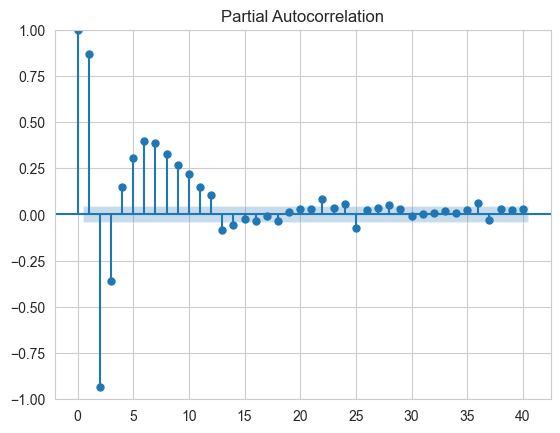

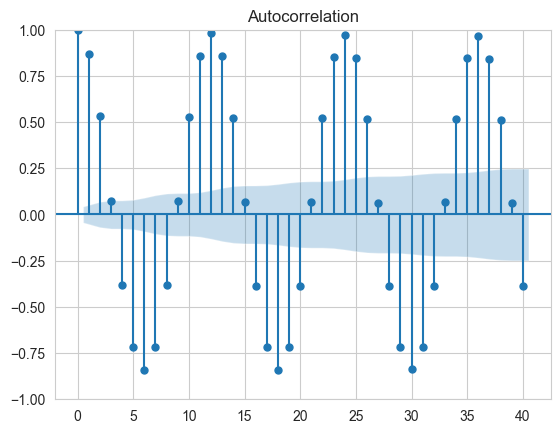

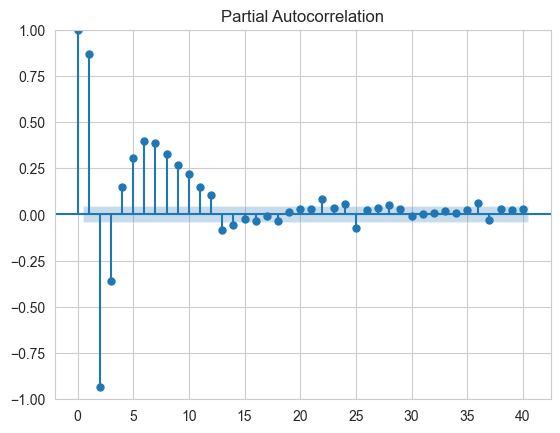

In [198]:
plot_acf(data["Actual Temperature_Air_Global"], lags=40)
plot_pacf(data["Actual Temperature_Air_Global"], lags=40)

### Model Performance

In [199]:
p, d, q = 15, 1, 8
model = ARIMA(data["Actual Temperature_Air_Global"], order=(p, d, q))
model_fit = model.fit()
model_summary = model_fit.summary()
model_summary

/opt/homebrew/anaconda3/envs/ece143_project/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/anaconda3/envs/ece143_project/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/anaconda3/envs/ece143_project/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Actual Temperature_Air_Global   No. Observations:                 2052
Model:                           ARIMA(15, 1, 8)   Log Likelihood                1133.626
Date:                           Tue, 26 Nov 2024   AIC                          -2219.253
Time:                                   22:25:11   BIC                          -2084.227
Sample:                                        0   HQIC                         -2169.737
                                          - 2052                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9630      0.349     -2.760      0.006      -1.647      -0.279
ar.L2         -0.7150      0.352     -2.034      0.042      -1.404      -0.026
ar.L3         -0.2677      0.176     -1.522      0.128      -0.612       0.077
ar.L4          0.1387      0.116      1.196      0.232      -0.089       0.366
ar.L5          0.1204      0.097      1.248      0.212      -0.069       0.310
ar.L6         -0.0971      0.116     -0.840      0.401      -0.324       0.129
ar.L7         -0.2631      0.112     -2.349      0.019      -0.483      -0.044
ar.L8         -0.3573      0.144     -2.488      0.013      -0.639      -0.076
ar.L9         -0.1466      0.089     -1.638      0.101      -0.322       0.029
ar.L10         0.1329      0.072      1.840      0.066      -0.009       0.275
ar.L11         0.3810      0.091      4.204      0.000       0.203       0.559
ar.L12         0.6703      0.128      5.247      0.000       0.420       0.921
ar.L13         0.6487      0.174      3.721      0.000       0.307       0.990
ar.L14         0.4414      0.152      2.911      0.004       0.144       0.738
ar.L15         0.1953      0.070      2.787      0.005       0.058       0.333
ma.L1          0.6265      0.350      1.790      0.073      -0.059       1.313
ma.L2          0.2541      0.311      0.818      0.413      -0.355       0.863
ma.L3         -0.2787      0.229     -1.218      0.223      -0.727       0.170
ma.L4         -0.5961      0.184     -3.245      0.001      -0.956      -0.236
ma.L5         -0.5181      0.111     -4.667      0.000      -0.736      -0.301
ma.L6         -0.2984      0.186     -1.608      0.108      -0.662       0.065
ma.L7         -0.1193      0.140     -0.853      0.394      -0.393       0.155
ma.L8          0.0413      0.107      0.385      0.701      -0.169       0.252
sigma2         0.0193      0.001     37.507      0.000       0.018       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):               123.83
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

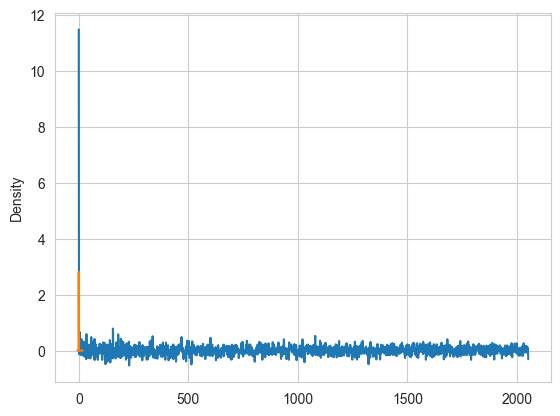

In [200]:
residuals = model_fit.resid
residuals.plot()
residuals.plot(kind='kde')
plt.show()

In [265]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit the model to training data. Replace p, d, q with our ARIMA parameters
model = ARIMA(train_data["Actual Temperature_Air_Global"], order=(p, d, q))  

# Forecast
model_fit = model.fit()
forecast_test_data = model_fit.forecast(steps=len(test_data))

/opt/homebrew/anaconda3/envs/ece143_project/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/anaconda3/envs/ece143_project/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/anaconda3/envs/ece143_project/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


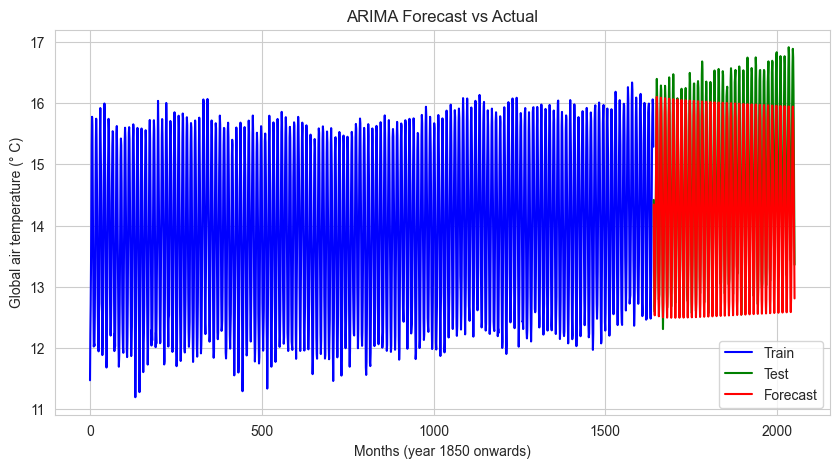

In [295]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data.index[:train_size], train_data["Actual Temperature_Air_Global"], label='Train', color='blue')
plt.plot(data.index[train_size:], test_data["Actual Temperature_Air_Global"], label='Test', color='green')
plt.plot(data.index[train_size:], forecast_test_data, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Months (year 1850 onwards)')
plt.ylabel('Global air temperature (° C)')
plt.show()

In [297]:
rmse = mean_squared_error(test_data["Actual Temperature_Air_Global"], forecast_test_data, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.5297656314428423


/opt/homebrew/anaconda3/envs/ece143_project/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Future predictions

In [298]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit the model to training data. Replace p, d, q with our ARIMA parameters
model = ARIMA(data["Actual Temperature_Air_Global"], order=(p, d, q))  

# Forecast
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(range(120)))

/opt/homebrew/anaconda3/envs/ece143_project/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/anaconda3/envs/ece143_project/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/anaconda3/envs/ece143_project/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


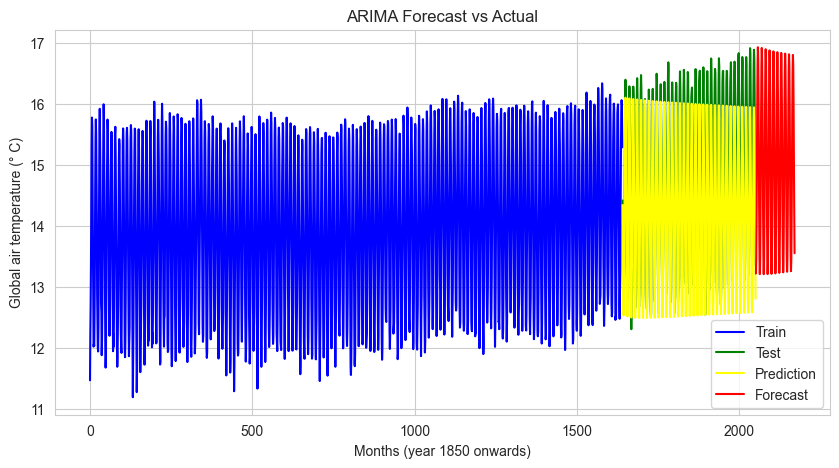

In [321]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data.index[:train_size], train_data["Actual Temperature_Air_Global"], label='Train', color='blue')
plt.plot(data.index[train_size:], test_data["Actual Temperature_Air_Global"], label='Test', color='green')
plt.plot(data.index[train_size:], forecast_test_data, label='Prediction', color='yellow')
plt.plot(range(len(data),len(data) +120), forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Months (year 1850 onwards)')
plt.ylabel('Global air temperature (° C)')
plt.savefig('../forecasting_results/arima_forecasts_train_test_future.png')

### Analyzing the predictions at a granular level

In [272]:
time_stamp = []
for i in range(2021,2031):
    for j in range(1,13):
        time_stamp.append(str(i) + "-" + str(j))

In [273]:
prediction_df = pd.DataFrame(data = {"Actual Temperature_Air_Global" :forecast.values,
                                     'year_month':time_stamp})

In [275]:
data['year_month'] = df.apply(lambda row: str(row['year'])+"-"+ str(row['month']), axis=1)

In [276]:
combined_data = pd.concat([data,prediction_df], axis=0).reset_index(drop=True)

In [277]:
combined_data[-130:]

,year,month,Actual Temperature_Air_Global,year_month
2042,2020.0,3.0,14.236000,2020-3
2043,2020.0,4.0,15.208000,2020-4
2044,2020.0,5.0,15.992000,2020-5
2045,2020.0,6.0,16.584000,2020-6
2046,2020.0,7.0,16.885000,2020-7
...,...,...,...,...
2167,NaN,NaN,16.610390,2030-8
2168,NaN,NaN,15.998666,2030-9
2169,NaN,NaN,15.128799,2030-10
2170,NaN,NaN,14.233938,2030-11


In [305]:
prediction_df['year'] = prediction_df.apply(lambda row: row['year_month'].split('-')[0], axis=1)
prediction_df['month'] = prediction_df.apply(lambda row: row['year_month'].split('-')[1], axis=1)

In [308]:
dummy = prediction_df.merge(prediction_df.groupby(['year']).agg({'Actual Temperature_Air_Global':'mean'}),
                    on=['year'], how='left')

In [316]:
dummy[dummy['month']=='7'][3:-1]

,Actual Temperature_Air_Global_x,year_month,year,month,Actual Temperature_Air_Global_y
42,16.874000,2024-7,2024,7,15.043490
54,16.858448,2025-7,2025,7,15.039141
66,16.845108,2026-7,2026,7,15.036365
78,16.832954,2027-7,2027,7,15.034574
90,16.821495,2028-7,2028,7,15.033414
102,16.810485,2029-7,2029,7,15.032662


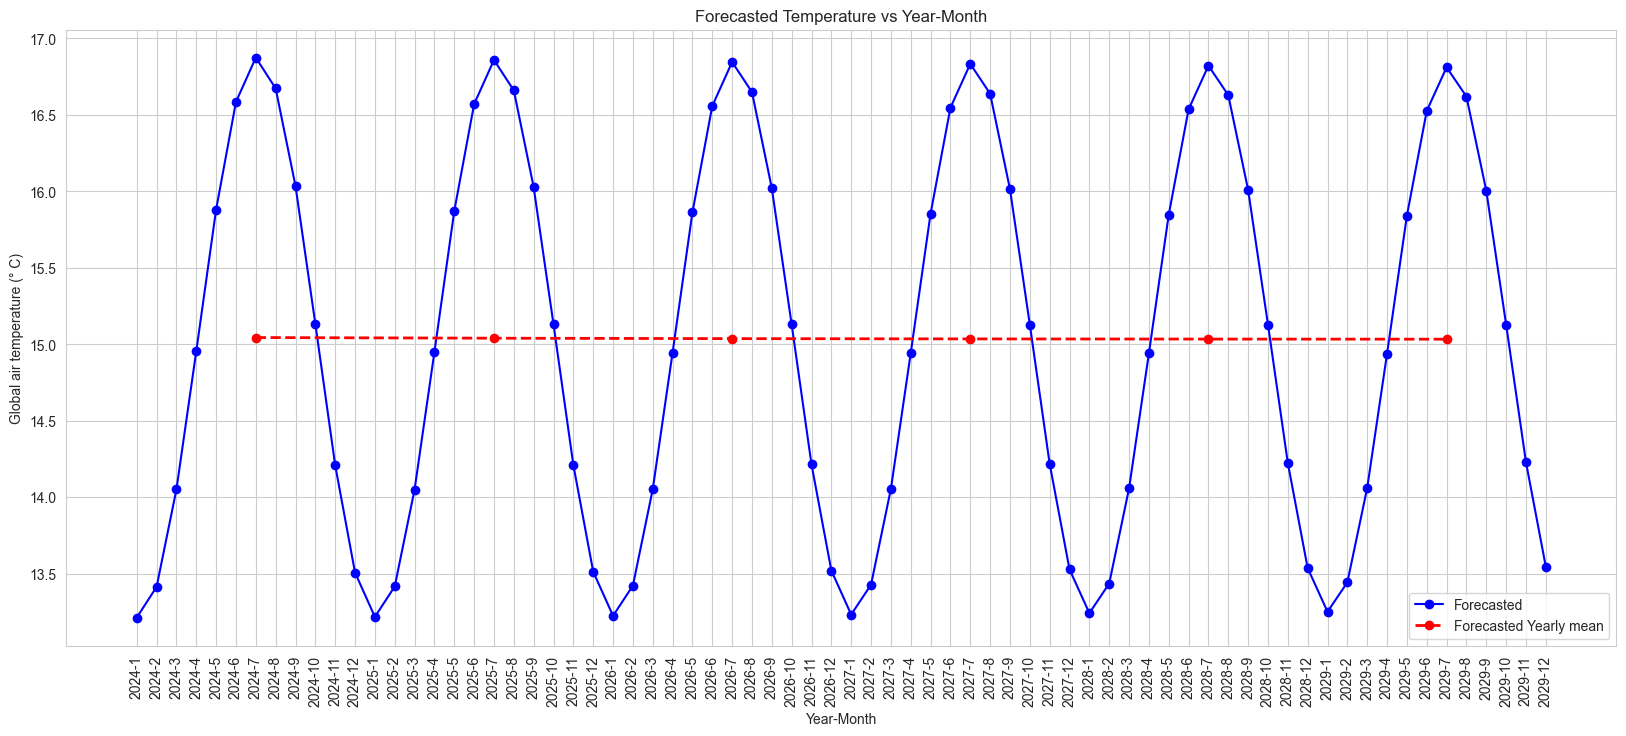

In [324]:
# Plotting
plt.figure(figsize=(20, 8))
# plt.plot(combined_data.year_month[:-120], combined_data["Actual Temperature_Air_Global"][:-120], label='Actual', color='blue',)
plt.plot(combined_data.year_month[-84:-84+12*6], combined_data["Actual Temperature_Air_Global"][-84:-84+12*6], label='Forecasted', color='blue',marker='o')
# plt.plot(data.index[train_size:], forecast, label='Forecast', color='red')
# plt.legend()
plt.plot(dummy[dummy['month']=='7'][3:-1]['year_month'], dummy[dummy['month']=='7'][3:-1]['Actual Temperature_Air_Global_y'],
         label = 'Forecasted Yearly mean', color = 'red', linewidth = 2, linestyle = '--', marker = 'o')
plt.title('Forecasted Temperature vs Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Global air temperature (° C)')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('../forecasting_results/future_temp.png')

In [326]:
dummy[dummy['month']=='7'][3:-1]

,Actual Temperature_Air_Global_x,year_month,year,month,Actual Temperature_Air_Global_y
42,16.874000,2024-7,2024,7,15.043490
54,16.858448,2025-7,2025,7,15.039141
66,16.845108,2026-7,2026,7,15.036365
78,16.832954,2027-7,2027,7,15.034574
90,16.821495,2028-7,2028,7,15.033414
102,16.810485,2029-7,2029,7,15.032662
